In [1]:
import pickle
import numpy as np
import PIL.Image
import itertools
from sklearn.model_selection import train_test_split
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [2]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

In [3]:
y = train['labels']
X = train['data']
X_no_labels = test_no_lables['data']

y[y == 6] = 1
y[y == 5] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=241)

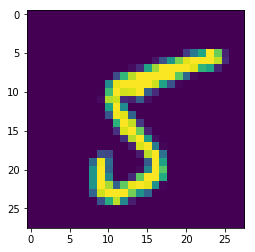

In [4]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][0].reshape(28,28))

# Обучаем модель

In [5]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean) / (std + 0.001)
X_train = np.hstack([ np.ones((X_train.shape[0], 1)), X_train] )

X_test = (X_test - mean) / (std + 0.001)
X_test = np.hstack([ np.ones((X_test.shape[0], 1)), X_test] )

X_no_labels = (X_no_labels - mean) / (std + 0.001)
X_no_labels = np.hstack([ np.ones((X_no_labels.shape[0], 1)), X_no_labels] )

In [6]:
np.random.seed(11)
w = np.random.normal(scale=0.001, size = X_train.shape[1])

In [7]:
def LogLoss(x_, y_, w_):
    loss = 0
    for i in range(x_.shape[0]):
        loss += math.log(1 + math.exp(-y_[i] * np.dot(w_.T, x_[i])))
    return loss / x_.shape[0]

In [8]:
def accuracy(X_, y_, w_):
    p = LogisticRegression(X_, w_)
    p[p >= 0.5] = 1
    p[p <  0.5] = -1
    right_answers = 0
    for i in range(p.shape[0]):
        if p[i] == y_[i]:
            right_answers += 1
    return right_answers / p.shape[0]

In [9]:
def LogisticRegression(X_, w_):
    return np.array([1 / (1 + math.exp(- np.dot(w_.T, X_[i]))) for i in range(X_.shape[0])])

In [10]:
X_train.shape

(6700, 785)

In [ ]:
#unfortenately, without cross_validation
import tqdm
epochs = 400
test_logloss = np.empty(epochs)
train_logloss = np.empty(epochs)
train_accuracy = np.empty(epochs)
test_accuracy  = np.empty(epochs)

for iter in tqdm.tqdm_notebook(range(epochs)):
    for i in range(X_train.shape[0]):
        j = np.random.randint(0, X_train.shape[0])
        grad = - y_train[j] * X_train[j] / ( 1 + math.exp( y_train[j] * np.dot(w.T, X_train[j]) ) ) + 0.01 * w
        w = w - grad * 0.002
    train_logloss[iter]  = LogLoss(X_train, y_train, w)
    test_logloss[iter]   = LogLoss(X_test,  y_test, w)
    train_accuracy[iter] = accuracy(X_train, y_train, w)
    test_accuracy[iter]  = accuracy(X_test,  y_test, w)

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

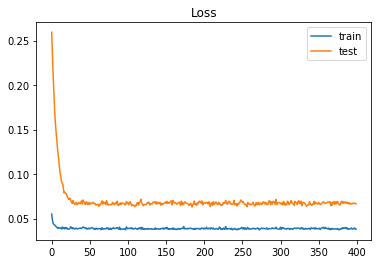

In [11]:
plt.title('Loss')
plt.plot(train_logloss, label='train')
plt.plot(test_logloss, label='test')
plt.legend()

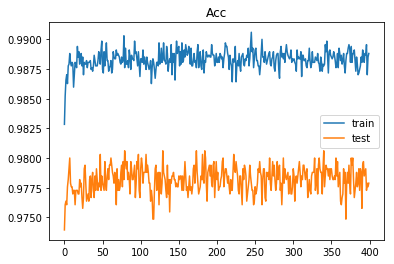

In [12]:
plt.title('Acc')
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [13]:
Y_pred = LogisticRegression(X_no_labels, w)

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(Y_pred.shape[0]):
        print(i, np.round(Y_pred[i], 7), sep=',', file=fout)

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/34e77301ef914c5792e4f4306144a6b3 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Тему письма писать в формате "[МФТИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем <ваша фамилия>.ipynb